In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

DATA_PATH = "../../data/raw/kinematic_equation_dataset.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at path: {DATA_PATH}")

In [2]:
df = pd.read_csv(DATA_PATH)

print(f"Dataset loaded: {df.shape[0]} rows x {df.shape[1]} columns")
df.head()

Dataset loaded: 3000 rows x 3 columns


,Acceleration_ms2,Time_s,Displacement_m
0,7.803532,6.759760,178.288670
1,19.038929,7.987146,607.289463
2,14.773882,2.579632,49.156415
3,12.173840,6.286254,240.536730
4,3.542363,5.760285,58.769379


In [3]:
df["computed_displacement"] = 0.5 * df["Acceleration_ms2"] * df["Time_s"]**2
df["abs_error"] = np.abs(df["computed_displacement"] - df["Displacement_m"])

max_error = df["abs_error"].max()
mean_error = df["abs_error"].mean()
tolerance = 1e-6

print(f"Max error: {max_error:.6e}")
print(f"Mean error: {mean_error:.6e}")

if max_error < tolerance:
    print("Displacement values are physically consistent.")
else:
    print("Displacement values deviate beyond acceptable tolerance.")

Max error: 5.684342e-13
Mean error: 1.306305e-14
Displacement values are physically consistent.


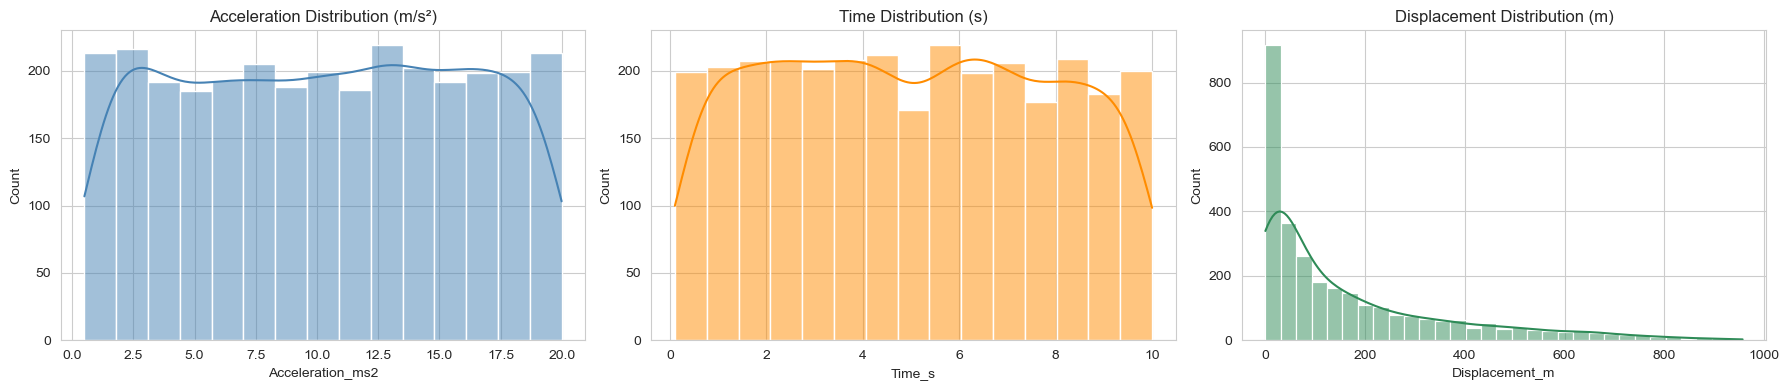

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(df["Acceleration_ms2"], kde=True, ax=axs[0], color="steelblue")
axs[0].set_title("Acceleration Distribution (m/s²)")

sns.histplot(df["Time_s"], kde=True, ax=axs[1], color="darkorange")
axs[1].set_title("Time Distribution (s)")

sns.histplot(df["Displacement_m"], kde=True, ax=axs[2], color="seagreen")
axs[2].set_title("Displacement Distribution (m)")

plt.tight_layout()
plt.show()

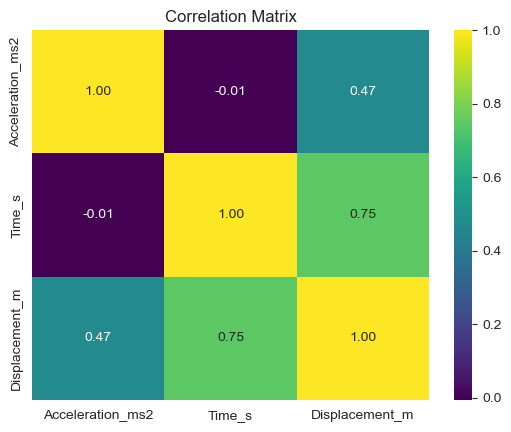

In [5]:

corr = df[["Acceleration_ms2", "Time_s", "Displacement_m"]].corr()
sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()